C:\Users\Antoi\AppData\Local\Temp\ipykernel_26724\272381857.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


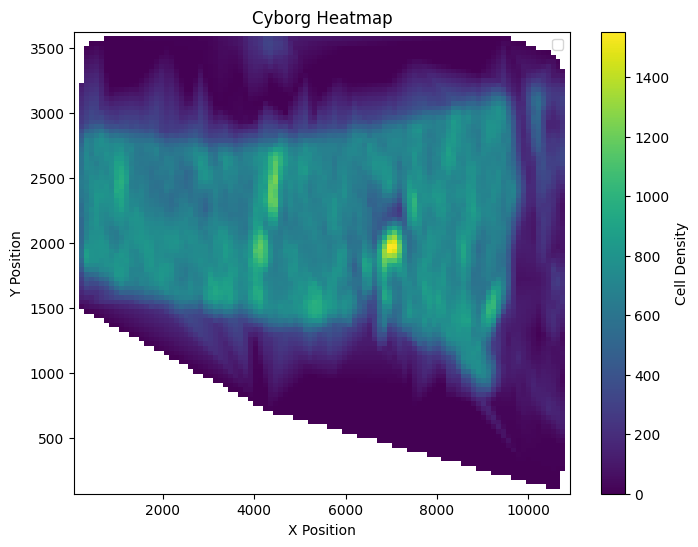

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Assuming `matrix_pos` and `cell_density` are defined
# Example data for demonstration purposes:
# matrix_pos = np.random.rand(100, 2) * 10  # Random positions in a 10x10 area
# cell_density = np.random.rand(100, 1)     # Random density values

# Load data from CSV files
matrix_pos = pd.read_csv('matrix_pos.csv', header=None).values  # Assuming no headers in the CSV
cell_density = pd.read_csv('cell_density.csv', header=None).values  # Assuming no headers in the CSV
densities = cell_density[1:, 1]
# Convert cell_density to a 1D array if it's not already
#cell_density = cell_density.flatten()

# Create a DataFrame to better manage the data
df = pd.DataFrame(matrix_pos[1:,:], columns=['X', 'Y'])
df['Density'] = densities

df['X'] = pd.to_numeric(df['X'], errors='coerce')
df['Y'] = pd.to_numeric(df['Y'], errors='coerce')


# Define grid points for the heatmap
grid_x, grid_y = np.mgrid[
    df['X'].min():df['X'].max():100j, 
    df['Y'].min():df['Y'].max():100j
]

# Interpolate the data to fit the grid
grid_z = griddata(
    points=matrix_pos[1:,:], values=densities, 
    xi=(grid_x, grid_y), method='linear'
)

# Plot the heatmap
plt.figure(figsize=(8, 6))
heatmap = plt.pcolormesh(grid_x, grid_y, grid_z, shading='auto', cmap='viridis')
plt.colorbar(heatmap, label='Cell Density')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Cyborg Heatmap')
plt.legend()
plt.show()
